In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.options.display.max_columns = 100

In [3]:
path = '../Data/2018_rc_data.xlsx'
xl = pd.ExcelFile(path)
sheet_names = xl.sheet_names
sheet_names

['READ ME_Instructions',
 'ACT',
 'achievement',
 'discipline',
 'chronic_absenteeism',
 'CTE',
 'dropout',
 'ELPA',
 'enrollment',
 'finance',
 'grad_rate',
 'growth',
 'growth_subjects',
 'indicator_level_grades',
 'long_term_ell',
 'overall_grades',
 'postsec_enrollment',
 'ready_grad',
 'staffing',
 'success_rate',
 'teacher_retention',
 'district_info',
 'school_info']

In [4]:
for sheetname in sheet_names:
    if sheetname != 'READ ME_Instructions':
        vars()['df' + sheetname] = pd.read_excel(path, sheet_name= sheetname)

In [5]:
dfteacher_retention['percent_retained'] = dfteacher_retention['percent_retained'].replace('\*+', np.nan, regex=True)

In [6]:
dfteacher_retention['percent_retained'] = dfteacher_retention['percent_retained'].astype(float)

In [7]:
by_district_teach_ret=dfteacher_retention[dfteacher_retention['school_name'].isnull()&dfteacher_retention['district_name'].notnull()]

In [17]:
by_district_teach_ret=by_district_teach_ret[['district_name','percent_retained']]

In [18]:
school_overall_grades =  dfoverall_grades [['district_name','school_name', 'score_achievement', 'score_growth', 'score_absenteeism', 'score_grad']]

In [19]:
school_overall_grades.head()

,district_name,school_name,score_achievement,score_growth,score_absenteeism,score_grad
0,Anderson County Schools,Anderson County High School,1.6,3.1,1.4,3.2
1,Anderson County Schools,Andersonville Elementary,2.2,3.6,2.4,NaN
2,Anderson County Schools,Briceville Elementary,3.0,3.8,0.0,NaN
3,Anderson County Schools,Claxton Elementary,3.2,3.6,0.0,NaN
4,Anderson County Schools,Clinton Middle School,2.0,0.1,1.1,NaN


In [20]:
avg_grades_district= school_overall_grades.groupby('district_name').mean().reset_index()

In [21]:
avg_grades_district.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   district_name      146 non-null    object 
 1   score_achievement  142 non-null    float64
 2   score_growth       142 non-null    float64
 3   score_absenteeism  142 non-null    float64
 4   score_grad         123 non-null    float64
dtypes: float64(4), object(1)
memory usage: 5.8+ KB


In [22]:
rc_1 = by_district_teach_ret.merge(avg_grades_district, 
                        on = 'district_name')

In [23]:
rc_1.head()


,district_name,percent_retained,score_achievement,score_growth,score_absenteeism,score_grad
0,Anderson County Schools,89.5,2.066667,2.693333,1.346667,2.900000
1,Clinton City School District,82.6,2.600000,3.133333,2.500000,NaN
2,Oak Ridge City Schools,86.0,2.000000,1.900000,2.457143,3.000000
3,Bedford County Schools,88.2,1.550000,1.100000,2.464286,3.333333
4,Benton School System,94.3,2.080000,3.000000,3.000000,4.000000


<AxesSubplot:xlabel='percent_retained', ylabel='score_achievement'>

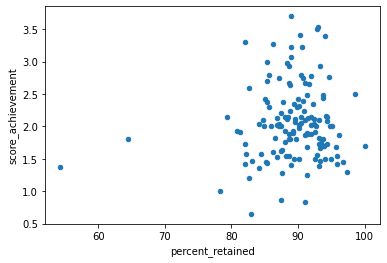

In [24]:
rc_1.plot.scatter(x = 'percent_retained', y = 'score_achievement' )

In [25]:
rc_1['percent_retained'].corr(rc_1['score_achievement'])

0.1012123090856533

In [27]:
rc_1.corr()

,percent_retained,score_achievement,score_growth,score_absenteeism,score_grad
percent_retained,1.000000,0.101212,0.206338,-0.016930,0.026178
score_achievement,0.101212,1.000000,0.460054,0.269532,0.172328
score_growth,0.206338,0.460054,1.000000,0.141903,0.186923
score_absenteeism,-0.016930,0.269532,0.141903,1.000000,0.137950
score_grad,0.026178,0.172328,0.186923,0.137950,1.000000
